In [1]:
# Import Keras packages
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import numpy as np

In [ ]:
# Creating the training and validation data generators
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=40,        # Xoay ngẫu nhiên trong khoảng [-40, 40] độ
#     width_shift_range=0.2,    # Dịch chuyển ngang tối đa 20% chiều rộng ảnh
#     height_shift_range=0.2,   # Dịch chuyển dọc tối đa 20% chiều cao ảnh
#     shear_range=0.2,          # Biến dạng cắt xén
#     zoom_range=0.2,           # Phóng to hoặc thu nhỏ ảnh
#     horizontal_flip=True,     # Lật ngang
#     fill_mode='nearest',      # Điền giá trị pixel còn thiếu sau khi biến đổ
#     brightness_range=[0.8, 1.2]
# )
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Loading the training set
training_set = train_datagen.flow_from_directory(
    'train',  # Path to the training data folder
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Loading the validation set
test_set = test_datagen.flow_from_directory(
    'val',  # Path to the validation data folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Printing class indices (label mapping)
label_map = training_set.class_indices
print("Class label mapping:", label_map)

Found 10000 images belonging to 10 classes.
Found 900 images belonging to 10 classes.
Class label mapping: {'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [ ]:
for i, (x_batch, y_batch) in enumerate(training_set):
    print(f"Batch {i + 1}: x shape={x_batch.shape}, y shape={y_batch.shape}")
    if i >= len(training_set) - 1:  # Kiểm tra batch cuối
        break


Batch 1: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 2: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 3: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 4: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 5: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 6: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 7: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 8: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 9: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 10: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 11: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 12: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 13: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 14: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 15: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 16: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 17: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 18: x shape=(32, 224, 224, 3), y shape=(32, 10)
Batch 19: x shape=(32, 224, 224, 3), 

KeyboardInterrupt: 

In [ ]:
print(f"Number of batches in training set: {len(training_set)}")
print(f"Number of batches in validation set: {len(test_set)}")


Number of batches in training set: 313
Number of batches in validation set: 29


In [ ]:
for i, (images, labels) in enumerate(training_set):
    print(f"Batch {i + 1}:")
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"Image pixel range: {images.min()} - {images.max()}")
    if i == 2:  # Kiểm tra 3 batch đầu tiên
        break


Batch 1:
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 10)
Image pixel range: 0.0 - 0.9787123799324036
Batch 2:
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 10)
Image pixel range: 0.0 - 0.9996623396873474
Batch 3:
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 10)
Image pixel range: 0.0 - 0.9970190525054932


In [ ]:
# Part 1: Building the CNN
classifier = Sequential()

# Adding convolutional and pooling layers
classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(8, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classifier.add(Flatten())

# Adding a fully connected hidden layer
classifier.add(Dense(units=224, activation='relu'))
# classifier.add(Dropout(rate=0.5))

# Adding the output layer
classifier.add(Dense(units=10, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
print(classifier.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 109, 109, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 52, 52, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 224)            │     1,211,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,546 (4.66 MB)

 Trainable params: 1,220,546 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Fix random seed for reproducibility
# np.random.seed(1337)

checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

class DebugCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs:
            print(f"Epoch {epoch + 1}: Loss={logs.get('loss')}, "
                  f"Accuracy={logs.get('accuracy')}, "
                  f"Val_Loss={logs.get('val_loss')}, "
                  f"Val_Accuracy={logs.get('val_accuracy')}")
        else:
            print(f"Epoch {epoch + 1}: Logs are None!")

history = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=20,
    validation_data=test_set,
    validation_steps=len(test_set)
)


# Saving the trained model
model_file = 'keras_tomato_trained_model2.keras'
classifier.save(model_file)
print(f'Saved trained model as {model_file}')


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 127s 406ms/step - accuracy: 0.1140 - loss: 2.3039 - val_accuracy: 0.2656 - val_loss: 2.0935
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 112us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 429ms/step - accuracy: 0.2441 - loss: 2.0815 - val_accuracy: 0.3667 - val_loss: 1.7587
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 125s 398ms/step - accuracy: 0.3541 - loss: 1.7875 - val_accuracy: 0.4578 - val_loss: 1.5533
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
 57/313 ━━━━━━━━━━━━━━━━━━━━ 1:44 407ms/step - accuracy: 0.4992 - loss: 1.4932

KeyboardInterrupt: 

Class Labels Mapping: {0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___Septoria_leaf_spot', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 6: 'Tomato___Target_Spot', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8: 'Tomato___Tomato_mosaic_virus', 9: 'Tomato___healthy'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Dự đoán lớp: Tomato___Spider_mites Two-spotted_spider_mite (Chỉ số: 5), Xác suất: 0.7986


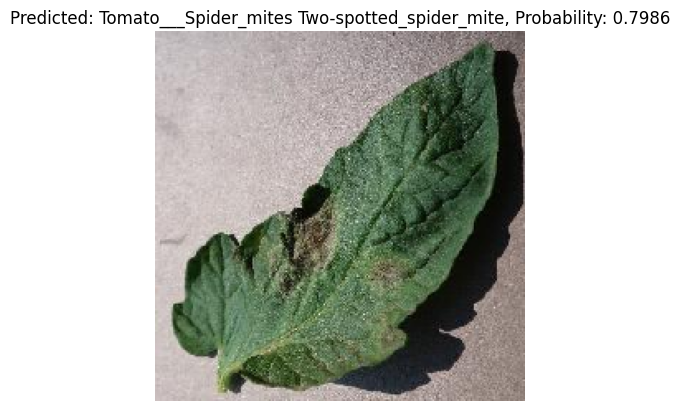

In [ ]:
# Lấy ánh xạ nhãn từ training_set
label_map = training_set.class_indices

# Đảo ngược ánh xạ để chuyển từ chỉ số -> tên lớp
class_labels = {v: k for k, v in label_map.items()}
print("Class Labels Mapping:", class_labels)

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Tải một ảnh từ đường dẫn
img_path = 'D:\\CaChua\\tomato\\test\\Tomato___Late_blight\\0a39aa48-3f94-4696-9e43-ff4a93529dc3___RS_Late.B 5103.JPG'# Thay bằng đường dẫn ảnh mới
img = load_img(img_path, target_size=(224, 224))  # Resize ảnh về (128, 128)
img_array = img_to_array(img) / 255.0  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch

# Dự đoán
predictions = classifier.predict(img_array)
predicted_class_index = np.argmax(predictions[0])  # Lấy chỉ số của lớp dự đoán
predicted_class_label = class_labels[predicted_class_index]  # Lấy nhãn lớp

# Hiển thị kết quả
print(f"Dự đoán lớp: {predicted_class_label} (Chỉ số: {predicted_class_index}), Xác suất: {predictions[0][predicted_class_index]:.4f}")

# Hiển thị ảnh và nhãn
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}, Probability: {predictions[0][predicted_class_index]:.4f}")
plt.axis('off')
plt.show()




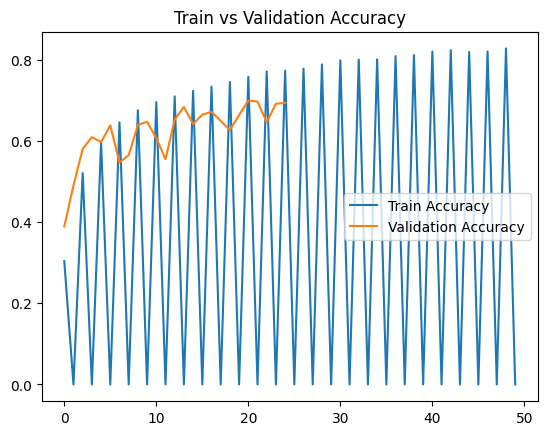

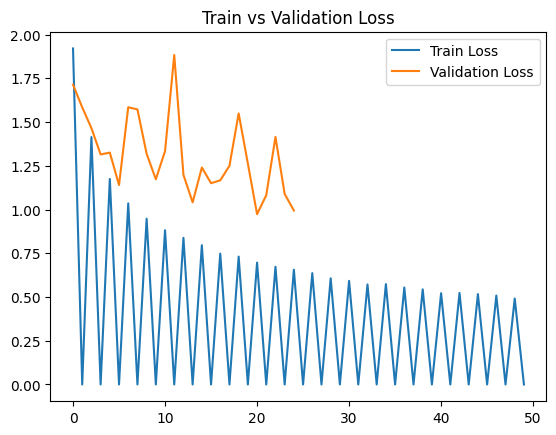

In [ ]:
# Xem lịch sử huấn luyện
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.legend()
plt.show()


In [ ]:
model = load_model('best_model.keras')

Class Labels Mapping: {0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___Septoria_leaf_spot', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 6: 'Tomato___Target_Spot', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8: 'Tomato___Tomato_mosaic_virus', 9: 'Tomato___healthy'}
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Dự đoán lớp: Tomato___Septoria_leaf_spot (Chỉ số: 4), Xác suất: 0.1006


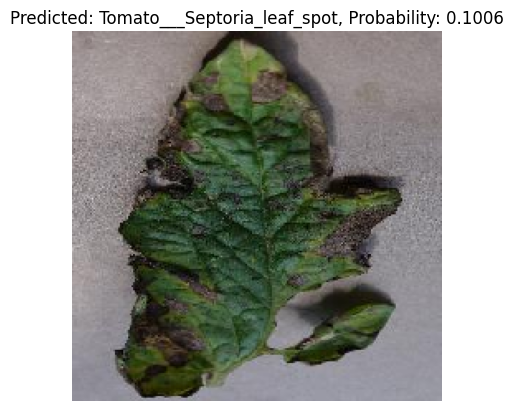

In [ ]:
# Lấy ánh xạ nhãn từ training_set
label_map = training_set.class_indices

# Đảo ngược ánh xạ để chuyển từ chỉ số -> tên lớp
class_labels = {v: k for k, v in label_map.items()}
print("Class Labels Mapping:", class_labels)

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Tải một ảnh từ đường dẫn
img_path = 'D:\\CaChua\\tomato\\test\\Tomato___Early_blight\\0ae44a6c-1213-4312-a11b-c7c5d4e585d0___RS_Erly.B 9442.JPG'# Thay bằng đường dẫn ảnh mới
img = load_img(img_path, target_size=(224, 224))  # Resize ảnh về (128, 128)
img_array = img_to_array(img) / 255.0  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều batch

# Dự đoán
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])  # Lấy chỉ số của lớp dự đoán
predicted_class_label = class_labels[predicted_class_index]  # Lấy nhãn lớp

# Hiển thị kết quả
print(f"Dự đoán lớp: {predicted_class_label} (Chỉ số: {predicted_class_index}), Xác suất: {predictions[0][predicted_class_index]:.4f}")

# Hiển thị ảnh và nhãn
plt.imshow(img)
plt.title(f"Predicted: {predicted_class_label}, Probability: {predictions[0][predicted_class_index]:.4f}")
plt.axis('off')
plt.show()




C:\Users\GIGABYTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │     1,211,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,546 (4.66 MB)

 Trainable params: 1,220,546 (4.66 MB)

 Non-trainable params: 0 (0.00 B)

None
Found 10000 images belonging to 10 classes.
Found 900 images belonging to 10 classes.


C:\Users\GIGABYTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.1542 - loss: 2.2274

C:\Users\GIGABYTE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 336s 1s/step - accuracy: 0.1543 - loss: 2.2270 - val_accuracy: 0.2667 - val_loss: 1.9339
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 196s 624ms/step - accuracy: 0.3586 - loss: 1.7610 - val_accuracy: 0.3700 - val_loss: 1.6954
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 620ms/step - accuracy: 0.4555 - loss: 1.5368 - val_accuracy: 0.4233 - val_loss: 1.7261
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 225s 720ms/step - accuracy: 0.5201 - loss: 1.3860 - val_accuracy: 0.4133 - val_loss: 1.7903
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 194s 620ms/step - accuracy: 0.5606 - loss: 1.2538 - val_accuracy: 0.4722 - val_loss: 1.7506
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 166s 530ms/step - accuracy: 0.5997 - loss: 1.1506 - val_accuracy: 0.5389 - val_loss: 1.5091
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 163s 522ms/step - accuracy: 0.6154 - loss: 1.0867 - val_accuracy: 0.6133 - val_loss: 1.2048
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 166s 531ms/step - accuracy: 0.6326 - loss: 1.0523 

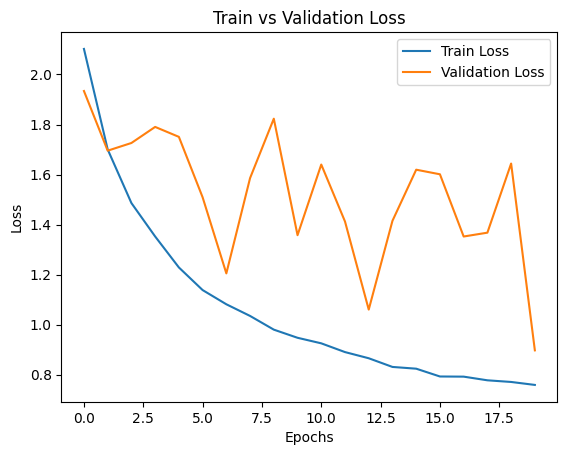

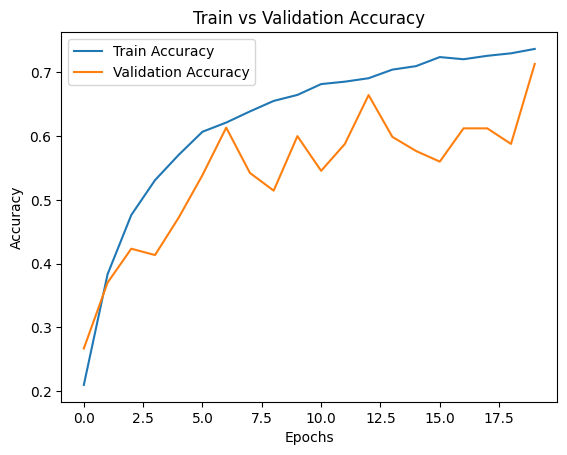

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Part 1: Building the CNN
classifier = Sequential()

# Adding convolutional and pooling layers
classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(16, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(8, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
classifier.add(Flatten())

# Adding a fully connected hidden layer
classifier.add(Dense(units=224, activation='relu'))
classifier.add(Dropout(rate=0.7))

# Adding the output layer
classifier.add(Dense(units=10, activation='softmax'))

# Compiling the CNN
classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

# Print model summary
print(classifier.summary())

# Part 2: Preprocessing the data
# train_datagen = ImageDataGenerator(rescale=1./255, 
#                                    shear_range=0.2, 
#                                    zoom_range=0.2, 
#                                    horizontal_flip=True)

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,        # Xoay ngẫu nhiên trong khoảng [-40, 40] độ
    width_shift_range=0.2,    # Dịch chuyển ngang tối đa 20% chiều rộng ảnh
    height_shift_range=0.2,   # Dịch chuyển dọc tối đa 20% chiều cao ảnh
    shear_range=0.2,          # Biến dạng cắt xén
    zoom_range=0.2,           # Phóng to hoặc thu nhỏ ảnh
    horizontal_flip=True,     # Lật ngang
    fill_mode='nearest',      # Điền giá trị pixel còn thiếu sau khi biến đổ
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Replace these directories with your actual dataset paths
training_set = train_datagen.flow_from_directory('train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')



validation_set = test_datagen.flow_from_directory('val',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

# Part 3: Training the CNN
history = classifier.fit(training_set,
                         epochs=20,
                         validation_data=validation_set)

# Part 4: Visualizing Training and Validation Results
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
